### Inverse Power Method is a numerical method for estimating the smallest eigenvalue and a corresponding eigenvector for a matrix.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def inverse_power_method(matA: np.ndarray, vecX: np.ndarray, epsilon: float = 1e-6, n_iter_max: int = 100000):
    """
    Inverse Power Method for finding smallest eigenvalue and the corresponding eigenvector of a matrix.

    Args:
        matA (np.ndarray): Input matrix.
        vecX (np.ndarray): Initial guess eigenvector.
        epsilon (float): Error tolerance for convergence. Default is 1e-6.
        n_iter_max (int): Maximum number of iterations. Default is 10000.

    Returns:
        eigen_arr (list): List of eigenvalues at each iteration.
        i (int): Number of steps taken to converge.
    """

    n = matA.shape[0]
    I = np.eye(n)
    print(f"Initial guess vector = {vecX}")

    q = np.dot(vecX, np.dot(matA, vecX)) / np.dot(vecX, vecX)  # Compute initial eigenvalue estimate
    p = np.argwhere(np.isclose(np.abs(vecX), np.linalg.norm(vecX, np.inf))).min()  # Find index of min element in x

    error = 1
    vecX = vecX / vecX[p]  # Normalize the initial eigenvector
    eigen_arr = []  # List to store eigenvalues

    for i in range(n_iter_max):
        y = np.linalg.solve(matA - q * I, vecX)  # Solve linear equation system
        eigen = y[p]  # Extract eigenvalue estimate
        p = np.argwhere(np.isclose(np.abs(y), np.linalg.norm(y, np.inf))).min()  # Update index of min element in y
        eigen = 1. / eigen + q  # Compute the final eigenvalue estimate
        eigen_arr.append(eigen)  # Store eigenvalue
        error = np.linalg.norm(vecX - y / y[p], np.inf)  # Compute error
        if error < epsilon:
            break
        vecX = y / y[p]  # Normalize eigenvector
        

    print(f'Eigenvalue = {eigen}')
    print(f'Eigenvector = {vecX / np.linalg.norm(vecX)}')
    print(f'No. of steps to converge = {i+1}')

    return eigen_arr,i+1


### Testing with Matrix $A=\begin{bmatrix}
2 & 1 & 2 \\
1 & 3 & 2 \\
2 & 4 & 1 
\end{bmatrix} $ 

In [3]:
matA = np.array([[2, 1, 2],
              [1, 3, 2],
              [2, 4, 1]])

#### 1. With intial guess eigenvector: `[-1, 0.5, 3]`

In [4]:
vecX1 = np.array([-1, 0.5, 3])

eigen_arr1, num_steps1 = inverse_power_method(matA,vecX1)

Initial guess vector = [-1.   0.5  3. ]
Eigenvalue = 1.336256148013036
Eigenvector = [ 0.88987504 -0.45081476 -0.06991755]
No. of steps to converge = 13


#### 2. With initial guess eigenvector: `[2, -6, 0.2]`

In [5]:
vecX2 = np.array([2, -6, 0.2])

eigen_arr2, num_steps2 = inverse_power_method(matA,vecX2)

Initial guess vector = [ 2.  -6.   0.2]
Eigenvalue = 1.336256113285203
Eigenvector = [ 0.88987487 -0.45081519 -0.06991694]
No. of steps to converge = 11


#### 3. Comparing the results with output of numpy API `numpy.linalg.eig` function

In [6]:
E,V = np.linalg.eig(matA)
print('Values generated by the numpy API numpy.linalg.eig')
print('Eigenvalue: ', E[-1])
print('Eigenvector: ', V[:,-1])

Values generated by the numpy API numpy.linalg.eig
Eigenvalue:  -1.3653678832385765
Eigenvector:  [-0.42138925 -0.29617582  0.85715284]


#### 4. Plotting the results

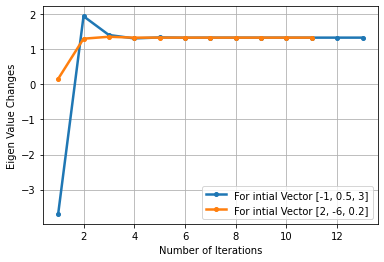

In [7]:
plt.plot(range(1,num_steps1+1),eigen_arr1, marker='o',label = "For intial Vector [-1, 0.5, 3]",linewidth=2.5,markersize=4)
plt.plot(range(1,num_steps2+1),eigen_arr2, marker='o' ,label = "For intial Vector [2, -6, 0.2]",linewidth=2.5,markersize=4)
plt.grid()

plt.xlabel("Number of Iterations")
plt.ylabel("Eigen Value Changes")
plt.rcParams['figure.figsize'] = [10, 7]
plt.legend()